Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [36]:
library(tidymodels)
library(readr)
library(moderndive)
library(ggplot2)

We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [37]:
hate_crimes <- read_csv('http://bit.ly/2ItxYg3')
head(hate_crimes)

Rows: 51 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): state, median_house_inc, trump_support, unemployment, urbanization
dbl (4): share_pop_metro, hs, hate_crimes, income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


state,median_house_inc,share_pop_metro,hs,hate_crimes,trump_support,unemployment,urbanization,income
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
New Mexico,low,0.69,83,0.295,low,high,low,46686
Maine,low,0.54,90,0.616,low,low,low,51710
New York,low,0.94,85,0.351,low,low,high,54310
Illinois,low,0.90,86,0.195,low,high,high,54916
Delaware,high,0.90,87,0.323,low,low,high,57522
Rhode Island,high,1.00,85,0.095,low,high,high,58633


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_parallel_slopes()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


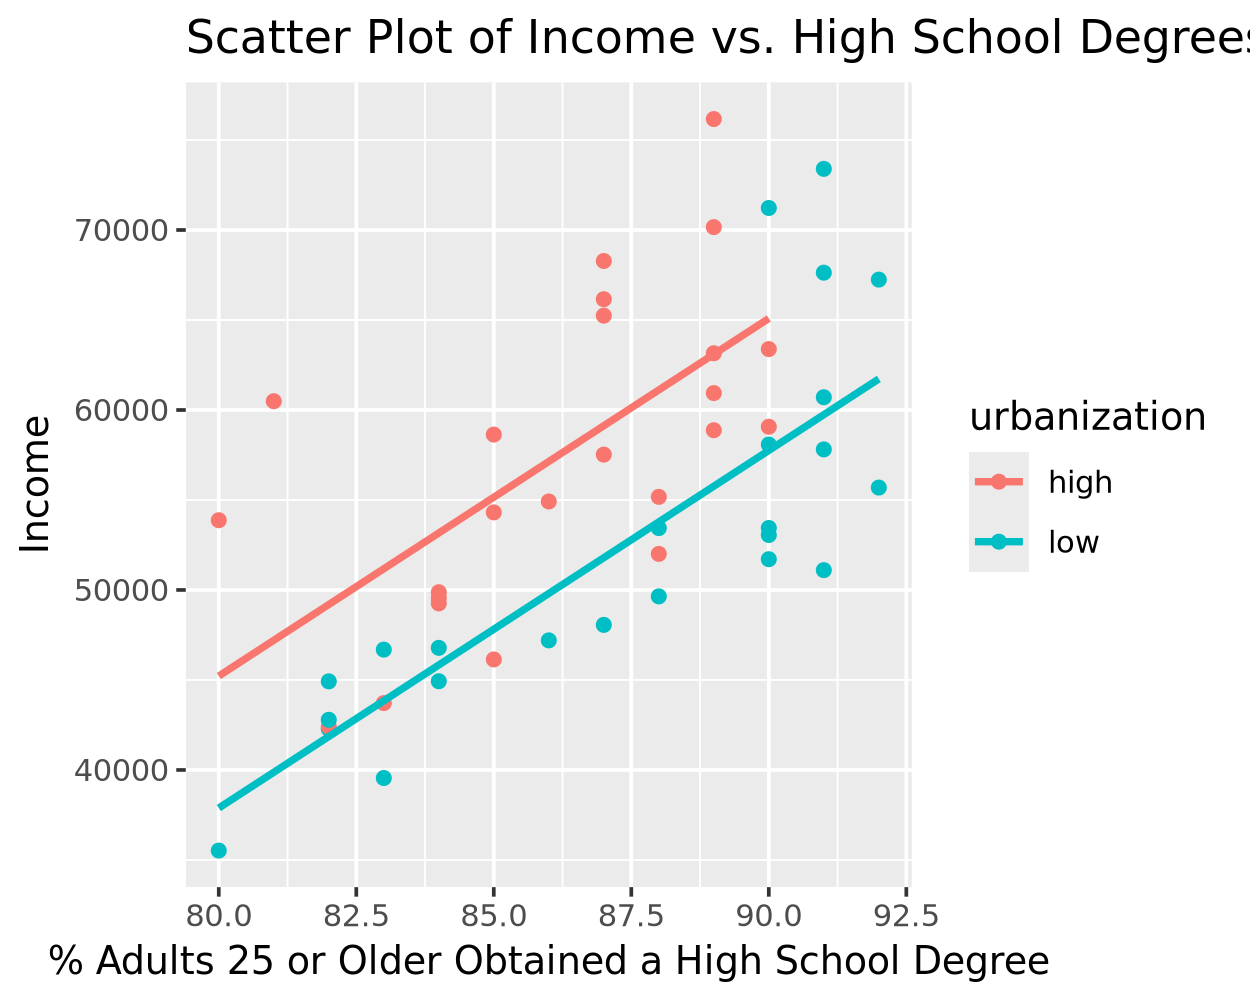

In [38]:
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point() +
  labs(title = "Scatter Plot of Income vs. High School Degrees",
       x = "% Adults 25 or Older Obtained a High School Degree",
       y = "Income") +
  geom_parallel_slopes(se = FALSE)

❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

In [39]:
# It looks like the high urbanization line has a larger intercept

Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code you your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


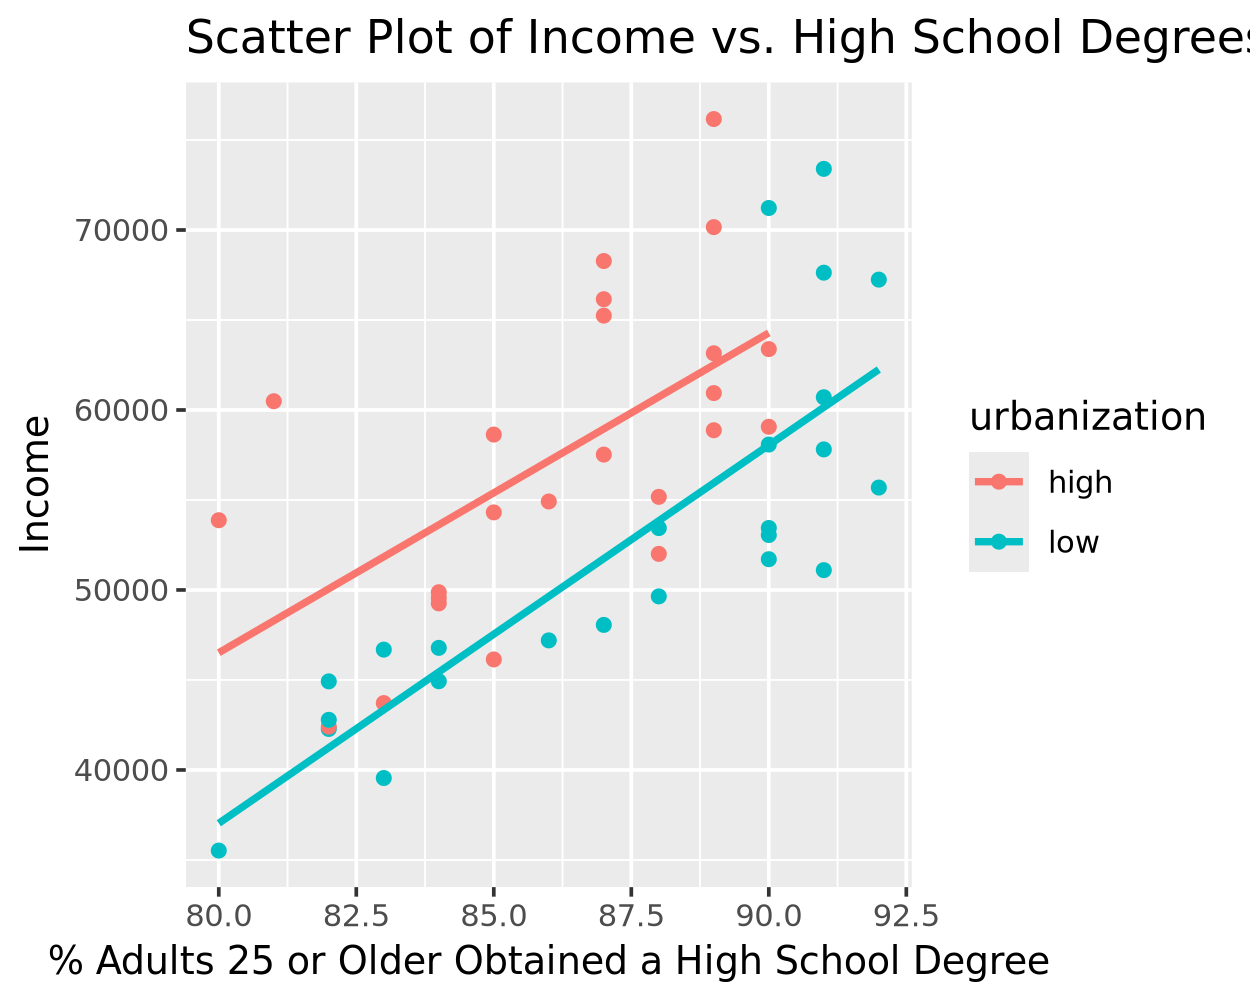

In [40]:
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point() +
  labs(title = "Scatter Plot of Income vs. High School Degrees",
       x = "% Adults 25 or Older Obtained a High School Degree",
       y = "Income") +
  geom_smooth(method = 'lm', se = FALSE)

❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

I think that running a "parallel slopes" model would be better in this case. One reason is that even with the interaction effect added the slopes are pretty close to parallel to start with. Another reason is that we are not so much trying to predict income values here as much as we are trying to understand the relationship between HS degrees and income. Its better to keep our model more interpretable given that the slopes are pretty similar anyway.



Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [41]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [42]:
# non-parallel slopes model

# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...

nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    step_interact(~ starts_with("urbanization"):hs) |>
    prep()                         # run the recipe on the training data provided

mod2 = linear_reg() |> set_engine('lm')

nps_mod = mod2 |> fit(income ~ ., juice(nps_rec))

nps_mod




parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [43]:
predictions <- rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)

model_rsq <- predictions |> 
    group_by(model) |>
    summarize(r_squared = var(.pred) / var(income))

head(model_rsq)


model,r_squared
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [44]:
ps_rsq <- glance(ps_mod)$r.squared
nps_rsq <- glance(nps_mod)$r.squared

sprintf("R-squared for parallel slopes model: %.7f", ps_rsq)
sprintf("R-squared for interaction model: %.7f", nps_rsq)

[1] "R-squared for parallel slopes model: 0.5716112"

[1] "R-squared for interaction model: 0.5746731"

❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

In [45]:
print(nps_rsq - ps_rsq)


[1] 0.003061884


The interaction model has a marginally higher r-squared value. So, the model with the interaction term is a tiny bit better at explaining the variability in income. Because this difference is so small, I think we are safe to stay with our more interpretable parallel slopes model. It is easier to interpret and peforms almost as well.

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [46]:
tidy(ps_mod)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


We see in the table above that the addition of the urbanization_low term adds a value of -7333.326 to our predicted income. In states with higher levels of urbanization, the income will be greater on average, because this term will not be included. This is what we saw in the initial parallel slopes plot, with our orange (high urb) values generally falling above the blue (low urb) values.

❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

From the table above we see that `hs` has a coefficient of 1986.794. For each one percentage point increase of high-school educated adults, `income` increases by an average of \$1986.80. We can see this too in our first plot. If we look at the regression line for high urbanization, at 85% for `hs` the corresponding `income` value is about \$55,000 while at 90% the `income` value is about \$65,000. An increase of about \\$2,000 per one percentage point.
